In [397]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [398]:
def f(x):
    return 3*x**2 - 4*x + 5

f(3.0)

20.0

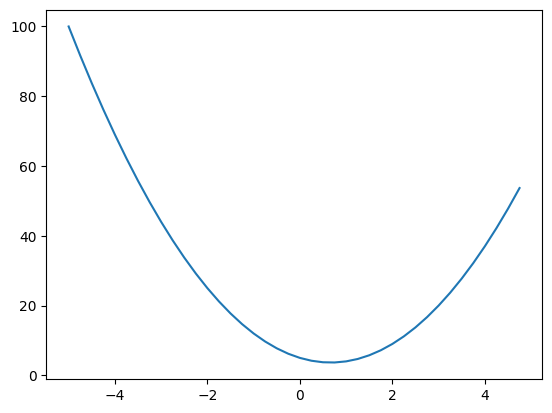

In [399]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs,ys)

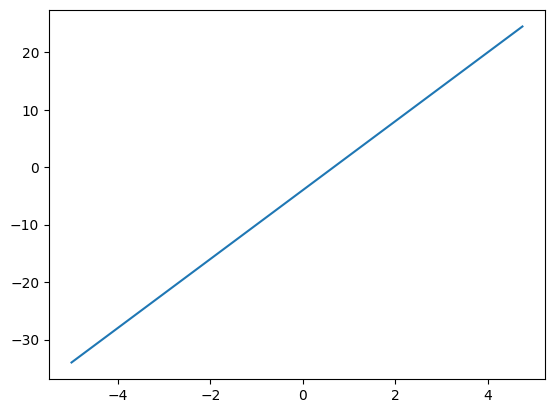

In [400]:
h = 0.0001
xs = np.arange(-5, 5, 0.25)
dfdx = (f(xs + h) - f(xs))/h
plt.plot(xs, dfdx)

In [401]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [402]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0
d1 = a*b + c # f(a, b, c)
a += h
d2 = a*b + c # f(a + h, b, c)

(d2 - d1)/h, d2

(-3.000000000010772, 3.999699999999999)

In [403]:
from value import Value

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = "L"
L

Value(data=-8.0)

In [404]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir': 'LR'})

    nodes, edges = trace(root)
    print(nodes)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = f"{n.label} | {n.data:.3f} | {n.grad:.3f}", shape='record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot


In [405]:
def test_der():
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = "L"
    L1 = L.data

    # add h to the variable we wanna see the derivative of 
    h = 0.00001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c') 
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = "L"
    L2 = L.data

    print(round((L2 - L1)/h, 2))
test_der()  

0.0


{Value(data=-6.0), Value(data=2.0), Value(data=-2.0), Value(data=-8.0), Value(data=4.0), Value(data=-3.0), Value(data=10.0)}


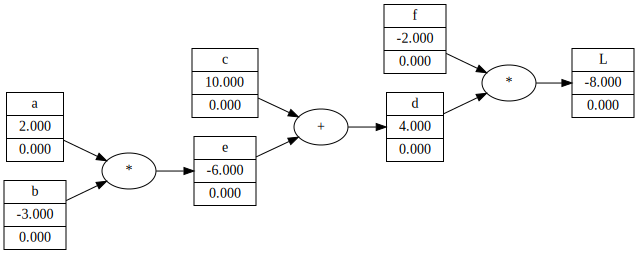

In [406]:
draw_dot(L)

In [407]:
# We will practice derivatives of L with respect to different variables from the graph above
# L = d * f
# 1. dL/dL = 1, this would be L.grad
L.grad = 1.0
# 2. dL/dd = f
d.grad = f.data
# 3. dL/df = d, this would be f.grad
f.grad = d.data

# We use the chain rule or however its called
# L = d * f, d = c + e
# We know dL/dd from 2.
# dL/de = dL/dd * dd/de
e.grad = d.grad * 1
# dL/dc = dL/dd * dd/dc 
c.grad = d.grad * 1

# L = d * f, d = c + e, e = a * b
# We know dL/dd and dd/de
# e.grad already has dL/dd in it because it's dL/dd * dd/de
print(e.grad, a.data, b.data)
# dL/db = dL/dd * dd/de * de/db 
b.grad = e.grad * a.data
# dL/da = dL/dd * dd/de * de/da 
a.grad = e.grad * b.data



-2.0 2.0 -3.0


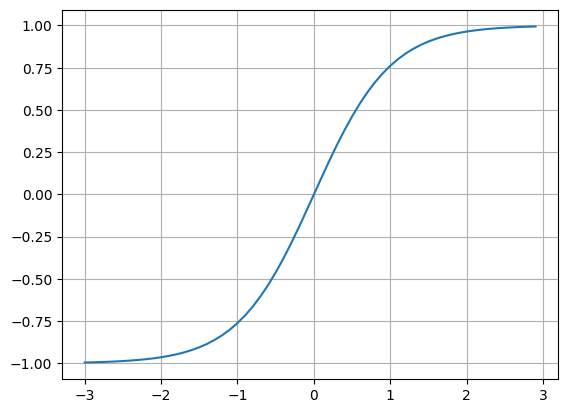

In [408]:
# We will use tanh as the activation function.
import numpy as np 
x = np.arange(-3, 3, 0.1)
y = np.tanh(x)
plt.plot(x, y); plt.grid()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from value import Value


In [411]:


# Let's write a formula that fits real ml notation and the neuron definition of f_activation(w*x + b)
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias of the neuron
b = Value(6.88137, label = 'b')

x1w1 = x1 * w1; x1w1.label = 'x1*w1' 
x2w2 = x2 * w2; x2w2.label = 'x2*w2' 
# This is the sum in the definition (sigma notation in definition)
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
out = n.tanh(); out.label = 'out'
print(out)


Value(data=0.7071049876722272)


In [412]:
# out.grad = 1.0
# n.grad = 1 - out.data**2
# x1w1x2w2.grad = 0.5
# b.grad = 0.5
# x1w1.grad = x1w1x2w2.grad
# x2w2.grad = x1w1x2w2.grad
# w1.grad = x1.data * x1w1.grad
# x1.grad = w1.data * x1w1.grad
# w2.grad = x2.data * x2w2.grad
# x2.grad = w2.data * x2w2.grad
# out.grad = 1.0
# out._backward()

In [413]:
out.backward()

{Value(data=1.0), Value(data=0.7071049876722272), Value(data=0.0), Value(data=0.0), Value(data=6.88137), Value(data=0.8813700000000004), Value(data=-6.0), Value(data=-3.0), Value(data=2.0), Value(data=-6.0)}


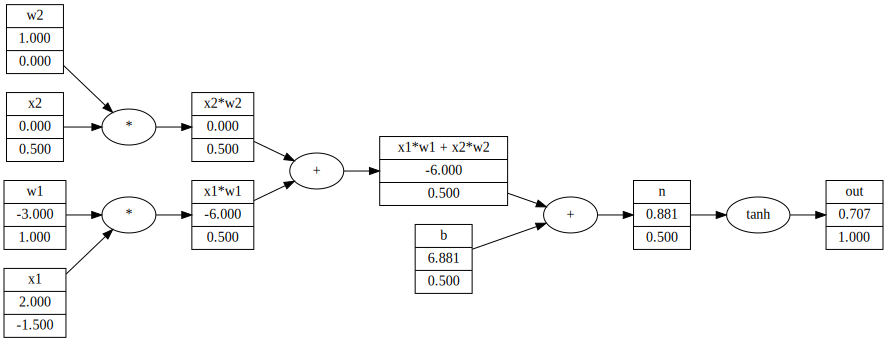

In [414]:
draw_dot(out)

In [415]:
a = Value(2.0)
a/5

Value(data=0.4)

{Value(data=0.0), Value(data=5.828385311532177), Value(data=2), Value(data=0.8813700000000004), Value(data=-3.0), Value(data=0.14644750616388644), Value(data=0.0), Value(data=-6.0), Value(data=1.0), Value(data=-1), Value(data=6.88137), Value(data=2.0), Value(data=-6.0), Value(data=1), Value(data=0.7071049876722272), Value(data=1.7627400000000009), Value(data=4.828385311532177), Value(data=6.828385311532177)}


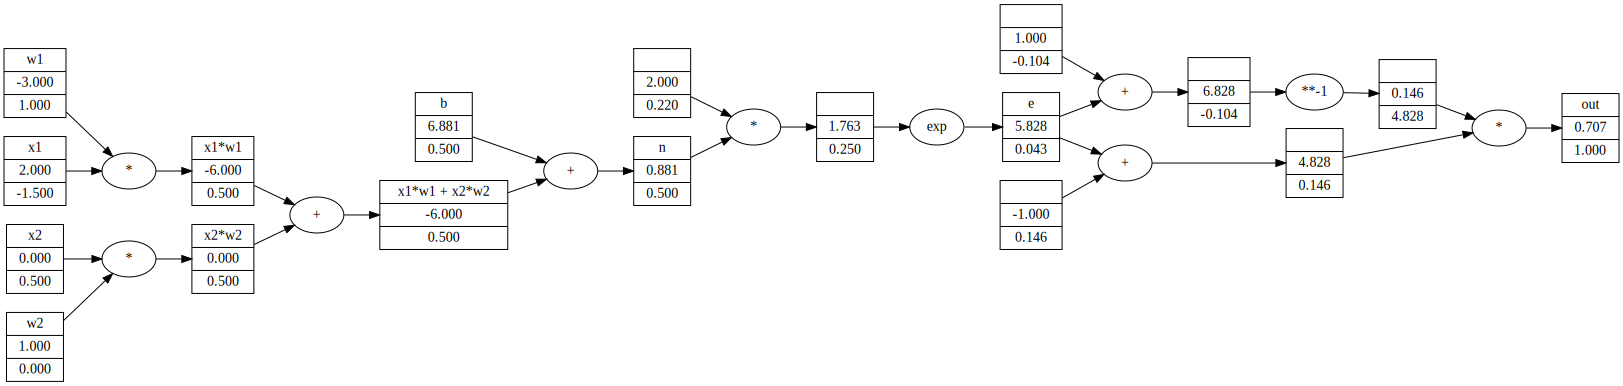

In [416]:
# Let's write a formula that fits real ml notation and the neuron definition of f_activation(w*x + b)
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias of the neuron
b = Value(6.88137, label = 'b')

x1w1 = x1 * w1; x1w1.label = 'x1*w1' 
x2w2 = x2 * w2; x2w2.label = 'x2*w2' 
# This is the sum in the definition (sigma notation in definition)
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----- testing new operations in the back propagation we are implementing
e = (2*n).exp()
e.label = 'e'
o = (e-1) / (e+1) 
o.label = 'out'
# should be the same as direct derivative as above
o.backward()
draw_dot(o)

In [417]:
# lets see this in pytorch
import torch

x1 = torch.Tensor([2.0]);      x1.requires_grad = True
x2 = torch.Tensor([0.0]);      x2.requires_grad = True
w1 = torch.Tensor([-3.0]);     w1.requires_grad = True
w2 = torch.Tensor([1.0]);      w2.requires_grad = True

b = torch.Tensor([6.88137]);       b.requires_grad = True

n = x1*w1 + x2*w2 + b
o = torch.tanh(n)
o.backward()

print(o.item())
print("x1.grad =", x1.grad.item())
print("x2.grad =", x2.grad.item())
print("w1.grad =", w1.grad.item())
print("w2.grad =", w2.grad.item())

0.7071050405502319
x1.grad = -1.5000073909759521
x2.grad = 0.5000024437904358
w1.grad = 1.0000048875808716
w2.grad = 0.0


In [418]:
x1.dtype, x1.double().dtype

(torch.float32, torch.float64)

In [419]:
import random
# Lets build a neural net piece by piece
class Neuron:

    def __init__(self, nin): #nin = number of inputs
        # weights
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        # bias
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x): 
        # w*x + b
        act = sum(wi * xi for wi,xi in zip(self.w, x)) + self.b
        return act.tanh()
    
    def __repr__(self):
        return f"Neuron(w={self.w}, b={self.b})"
    
    def parameters(self):
        return self.w + [self.b]
    
x = [2.0, 3.0]
n = Neuron(nin = 2)

n(x)

Value(data=-0.9946632635577214)

In [420]:
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        out = [neuron(x) for neuron in self.neurons]
        return out
    
    def __repr__(self):
        return f"Layer(neurons={len(self.neurons)})"
    
    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]

x = [2.0, 3.0]
n = Layer(nin = 2, nout = 3)

n(x)
n.parameters()

[Value(data=0.0735341335745423),
 Value(data=0.26019006893575547),
 Value(data=-0.5644441373398486),
 Value(data=0.5225973181364607),
 Value(data=-0.349944515086853),
 Value(data=0.5412792845037597),
 Value(data=-0.3802405231699877),
 Value(data=-0.012532915223702368),
 Value(data=0.785014337065653)]

In [421]:
class MLP:
    def __init__(self, nin, nouts):
        n = [nin] + nouts
        self.layers = [Layer(n[i], n[i+1]) for i in range(len(nouts))]
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x[0] if len(x) == 1 else x
    
    def parameters(self):
        return [p for n in self.layers for p in n.parameters()] 

mlp = MLP(3, [3, 3, 1])
x = [0.5, 1, -2]

mlp(x)
mlp.parameters()

[Value(data=0.7642807131850282),
 Value(data=0.702675068220032),
 Value(data=-0.7813228113452859),
 Value(data=-0.014604094157157244),
 Value(data=-0.2263745917655351),
 Value(data=-0.6495650091761258),
 Value(data=-0.4679008754010814),
 Value(data=-0.5876274928499583),
 Value(data=-0.9415755294027197),
 Value(data=0.023383044150922405),
 Value(data=0.6727975327153288),
 Value(data=-0.6662012986021311),
 Value(data=0.06465989915623815),
 Value(data=0.8637964951085597),
 Value(data=-0.03991252127009126),
 Value(data=0.4526546504100517),
 Value(data=-0.9498153447250619),
 Value(data=-0.6896708492622743),
 Value(data=-0.21276100362109296),
 Value(data=-0.8906857926304121),
 Value(data=0.6528701297845221),
 Value(data=-0.23867105398315158),
 Value(data=-0.8695313131134914),
 Value(data=0.1161830317532524),
 Value(data=-0.6019542112980256),
 Value(data=-0.5390678158108939),
 Value(data=-0.3709691124103798),
 Value(data=0.28407300412431313)]

In [422]:
# lets try to implement basic learning
net = MLP(3, [4, 4, 1])

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [-0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]
ypreds = [net(x) for x in xs]
ypreds

[Value(data=0.8357391631939377),
 Value(data=0.7736330603146928),
 Value(data=0.8402435564025956),
 Value(data=0.6995949115216374)]

In [423]:
# normally in neural nets we want a kinda one number  
# that represents the overall performance, we call it the loss function
# lets just use real_value - prediction 
# we want to sum it up so we dont want negatives as they would just cancel other values lol thus square
# this is 
def loss():
    ys = [1.0, -1.0, -1.0, 1.0]
    
    return loss_val
loss()

Value(data=3.26414433112826)

before step: Value(data=3.26414433112826)


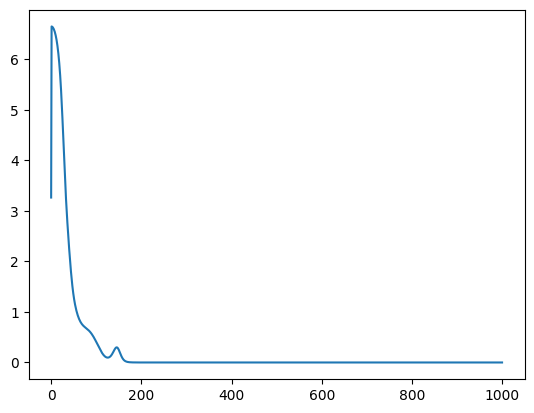

In [424]:
# now we want to lower the loss
# it would mean we are closer and closer to correct predictions
# if loss is 0 then we pretty much predicted everything perfectly
loss_val = loss()

print("before step:", loss_val)
# by calculating the gradient of our loss function 
# we can lower it through gradient descent

losses = [loss().data]
learning_rate = 0.0001

n = 1000
for i in range(n):
    # forward pass
    ypreds = [net(x) for x in xs]
    loss_val = sum((yreal - ypred)**2 for yreal, ypred in zip(ys, ypreds))

    # backward pass
    loss_val.backward()

    # step
    for p in net.parameters():
        p.data -= learning_rate * p.grad
    losses.append(loss().data)

plt.plot(range(n+1), losses)

In [425]:
# lets see predictions
ys = [1.0, -1.0, -1.0, 1.0]
ypreds = [net(x) for x in xs]
ypreds

[Value(data=1.0), Value(data=-1.0), Value(data=-1.0), Value(data=1.0)]

In [ ]:
# we taught our net from 0 to learn this pattern :)